In [7]:
"""
https://github.com/L1aoXingyu/pytorch-beginner/blob/master/08-AutoEncoder/simple_autoencoder.py
"""
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import os

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder()#.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img)#.cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0]))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './mlp_img/image_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')

/Users/kostas/anaconda3/envs/p3-ai/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch [1/100], loss:0.1946
epoch [2/100], loss:0.1704
epoch [3/100], loss:0.1681
epoch [4/100], loss:0.1548
epoch [5/100], loss:0.1551
epoch [6/100], loss:0.1548
epoch [7/100], loss:0.1416
epoch [8/100], loss:0.1471
epoch [9/100], loss:0.1419
epoch [10/100], loss:0.1389
epoch [11/100], loss:0.1382
epoch [12/100], loss:0.1444
epoch [13/100], loss:0.1361
epoch [14/100], loss:0.1360
epoch [15/100], loss:0.1382
epoch [16/100], loss:0.1408
epoch [17/100], loss:0.1366
epoch [18/100], loss:0.1385
epoch [19/100], loss:0.1313
epoch [20/100], loss:0.1314
epoch [21/100], loss:0.1239
epoch [22/100], loss:0.1316
epoch [23/100], loss:0.1327
epoch [24/100], loss:0.1311
epoch [25/100], loss:0.1224
epoch [26/100], loss:0.1241
epoch [27/100], loss:0.1250
epoch [28/100], loss:0.1229
epoch [29/100], loss:0.1408
epoch [30/100], loss:0.1207
epoch [31/100], loss:0.1235
epoch [32/100], loss:0.1383
epoch [33/100], loss:0.1238
epoch [34/100], loss:0.1253
epoch [35/100], loss:0.1240
epoch [36/100], loss:0.1244
e

KeyboardInterrupt: 

(28, 28)


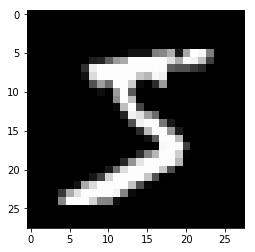

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
img,_ = dataset[0]
img = img.numpy().reshape(28,28)
print(img.shape)
plt.imshow(img)
plt.gray()
plt.show()